<a href="https://colab.research.google.com/github/Ricardo-geotechnical/Unsaturated-Flow-Mechanics/blob/main/Onedimensionalflow_Montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Probability that q < 3.00e-06: 0.1290


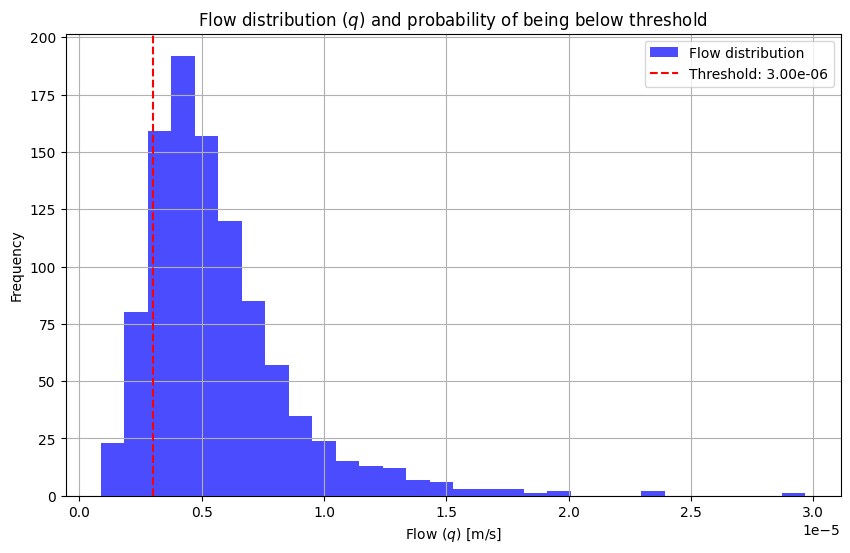

<Figure size 640x480 with 0 Axes>

In [2]:

# This is a simple code to understand how to implement a Monte Carlo analysis
# coupled with flow under saturated media in one dimension.
# Permeability (k) is considered a random variable.
# The goal is to determine the outlet flow distribution and the probability
# that the flow surpasses a given threshold with a certain degree of confidence.

import numpy as np
import matplotlib.pyplot as plt

# Input Parameters
h_in = 10       # Head at the inlet (m)
h_out = 5       # Head at the outlet (m)
L = 10          # Length of the domain (m)
N = 10          # Number of nodes
num_samples = 1000  # Number of Monte Carlo iterations
sigma_k = 0.5   # Standard deviation of permeability
k_mean = 1e-5   # Mean permeability value (m/s)

# Threshold for flow comparison
q_threshold = 3e-6  # Flow threshold value (m/s)

# Defining a function for the finite difference approximation
def finite_difference(h_in, h_out, L, k):
    dx = L / (N - 1)
    A = np.zeros((N, N))
    b = np.zeros(N)

    # Boundary conditions
    b[0] = h_in
    b[-1] = h_out
    A[0, 0] = 1
    A[-1, -1] = 1

    # Internal nodes
    # For each internal node, the system of equations is defined as follows:
    # d²h/dx² = 0
    # -k(h(i+1) - 2h(i) + h(i-1)) / dx² = 0
    # The "for" loop constructs the matrix that represents the system of equations
    # obtained by applying the discrete approximation at each node.

    for i in range(1, N - 1):
        A[i, i - 1] = k / dx**2
        A[i, i] = -2 * k / dx**2
        A[i, i + 1] = k / dx**2

    # Solving the linear system Ax = b
    h = np.linalg.solve(A, b)
    q = -k * (h[-1] - h[-2]) / dx   # Darcy's law for flux
    return q

# Monte Carlo simulation
# Permeability is sampled from a lognormal distribution,
# and the finite difference method is applied for each sample.
k_samples = np.random.lognormal(mean=np.log(k_mean), sigma=sigma_k, size=num_samples)
q_samples = [finite_difference(h_in, h_out, L, k) for k in k_samples]

# Probability that q < q_threshold
prob_q_below_threshold = np.sum(np.array(q_samples) < q_threshold) / num_samples


print(f"Probability that q < {q_threshold:.2e}: {prob_q_below_threshold:.4f}")

# Results and plots
plt.figure(figsize=(10, 6))
plt.hist(q_samples, bins=30, alpha=0.7, label='Flow distribution', color='blue')
plt.axvline(q_threshold, color='red', linestyle='--', label=f'Threshold: {q_threshold:.2e}')
plt.title('Flow distribution ($q$) and probability of being below threshold')
plt.xlabel('Flow ($q$) [m/s]')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()
plt.savefig('flux_distribution.png', dpi=300, bbox_inches='tight')
